In [1]:
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
g = {
    'E': ['C', 'H'],
    'C': ['B', 'D'],
    'G': ['H'],
    'B': [],
    'D': ['H'],
    'H': ['I']
}

initial = 'E'
goal = 'H'

In [3]:
G = nx.DiGraph(g)
pos = nx.spring_layout(G)

In [6]:
def DLS(g, initial, goal, limit):
    path = list()
    marked = set()
    startingDepth = 0
    return _DLS(g, initial, goal, marked, path, startingDepth, limit)

def _DLS(g, node, goal, marked, path, depth, limit):
    if depth > limit: return False
    path.append(node)
    if node == goal:
        return path
    marked.add(node)
    for i in g[node]:
        if i not in marked:
            newPath = _DLS(g, i, goal, marked, path, depth+1, limit)
            if newPath: return newPath
            else: path.pop()        
    return False

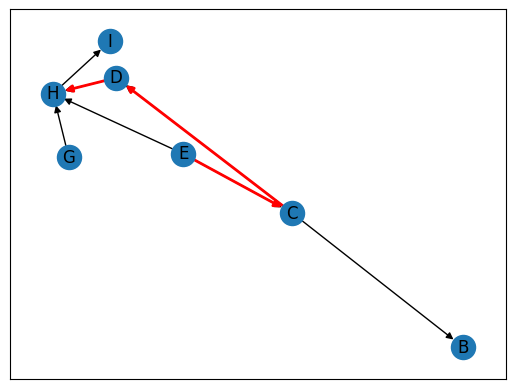

In [11]:
path = DLS(g, initial, goal, 3) # The required depth is 3 so it will work.
edgelist = [[path[i], path[i+1]] for i in range(len(path)-1)]
nx.draw_networkx(G, pos)
nx.draw_networkx_edges(G, pos, edgelist=edgelist, edge_color='r', width=2)
plt.show()